In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load data

Total_Primary_Energy_Consumption_Monthly

In [2]:
df1 = pd.read_csv('data/Total_Primary_Energy_Consumption_Monthly.csv',skiprows=4,index_col='Month',parse_dates=True)
df1.columns = ['total-primary-energy-monthly']
df1 = df1.sort_index()
df1.head()

,total-primary-energy-monthly
Month,
1973-01-01,7226.265
1973-02-01,6594.709
1973-03-01,6524.198
1973-04-01,5944.336
1973-05-01,6074.551


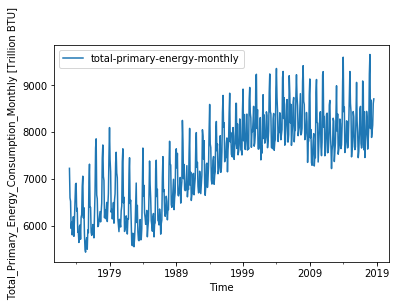

In [3]:
df1.plot()
plt.ylabel('Total_Primary_Energy_Consumption_Monthly [Trillion BTU]')
plt.xlabel('Time')
plt.show()

## Seasonal decompose plot

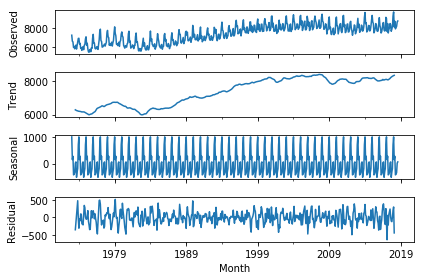

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df1['total-primary-energy-monthly']).plot()
plt.show()

In [5]:
x1 = df1.groupby(df1.index.strftime('%Y')).idxmax()
x1.columns = ['month-max-consumption']
x1.head()

,month-max-consumption
1973,1973-01-01
1974,1974-01-01
1975,1975-01-01
1976,1976-12-01
1977,1977-01-01


In [6]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1973 to 2018
Data columns (total 1 columns):
month-max-consumption    46 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 736.0+ bytes


In [24]:
x2 = pd.DatetimeIndex(x1['month-max-consumption']).month


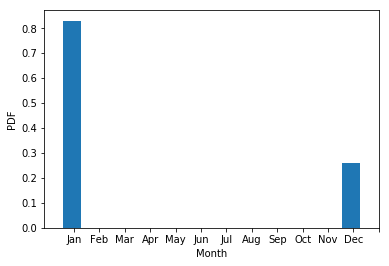

In [9]:
space = 11/12
x_month = [] #[1,,3,4,5,6,7,8,9,10,11,12]
for i in range(13):
    x_month.append(2+(i-1)*space)
    
x_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.hist(np.array(x2),bins=12,density=True,rwidth=0.7,align='left')
plt.xlabel('Month')
plt.ylabel('PDF')
plt.xlim([0,12])
plt.xticks(x_month,x_label)
plt.show()

In [11]:
df4 = pd.DataFrame()
for i in range(1973,2018):
    j = str(i)
    df4[j] = df1[j].reset_index()['total-primary-energy-monthly']

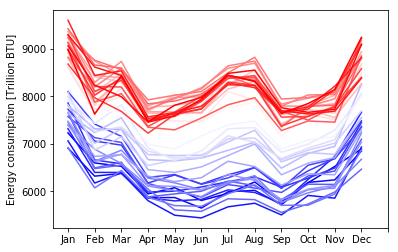

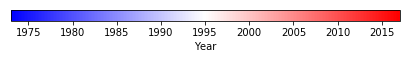

In [16]:
import matplotlib as mpl
df4.plot(colormap='bwr',legend=False)
plt.xticks(ticks=range(13),labels=x_label)
plt.ylabel('Energy consumption [Trillion BTU]')

# Colorbar
fig = plt.figure(figsize=(6, 1))
ax1 = fig.add_axes([1.05, 0.80, 0.9, 0.15])

cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=1973, vmax=2017)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Year')
plt.show()

## Total_Primary_Energy_Consumption_Annual

In [17]:
df2 = pd.read_csv('data/Total_Primary_Energy_Consumption_Annual.csv',skiprows=4,index_col='Year',parse_dates=True)
df2.columns = ['total-primary-energy-annual']
df2 = df2.sort_index()
df2.head()

,total-primary-energy-annual
Year,
1949-01-01,31981.503
1950-01-01,34615.768
1951-01-01,36974.030
1952-01-01,36747.825
1953-01-01,37664.468


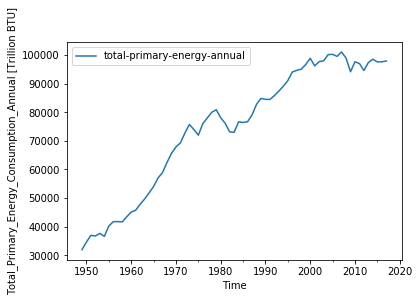

In [18]:
df2.plot()
plt.ylabel('Total_Primary_Energy_Consumption_Annual [Trillion BTU]')
plt.xlabel('Time')
plt.show()

In [19]:
df3 = pd.read_excel('data/Table_2.1_Energy_Consumption_by_Sector.xlsx',sheet_name=1,skiprows=10)
df3 = df3.dropna()

df3.head()

,Annual Total,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
1,1949.0,4460.43,5599.25,2668.87,3668.82,12633.4,14723.6,7879.51,7990.02,4339.47,-0.165,31981.5
2,1950.0,4829.34,5988.55,2834.09,3893.3,13889.6,16241.4,8383.41,8492.47,4679.28,0.021,34615.8
3,1951.0,5104.48,6380.19,2737.68,3873.23,15127.4,17678.5,8933.48,9041.89,5070.83,0.188,36974
4,1952.0,5158.19,6560.24,2672.91,3873.39,14671.6,17311.4,8906.89,9002.75,5338.18,0.082,36747.8
5,1953.0,5052.52,6558.75,2512.38,3770.98,15339.2,18211.8,9030.06,9123.02,5730.35,-0.039,37664.5


In [20]:
df5 = df3[['Total Energy Consumed by the Commercial Sector','Total Energy Consumed by the Residential Sector','Total Energy Consumed by the Transportation Sector','Total Energy Consumed by the Industrial Sector']]
df5.head()

,Total Energy Consumed by the Commercial Sector,Total Energy Consumed by the Residential Sector,Total Energy Consumed by the Transportation Sector,Total Energy Consumed by the Industrial Sector
1,3668.82,5599.25,7990.02,14723.6
2,3893.3,5988.55,8492.47,16241.4
3,3873.23,6380.19,9041.89,17678.5
4,3873.39,6560.24,9002.75,17311.4
5,3770.98,6558.75,9123.02,18211.8


In [21]:
year = pd.date_range('1949', '2018',freq='A').year
df5['Year']=year
df5.head()

,Total Energy Consumed by the Commercial Sector,Total Energy Consumed by the Residential Sector,Total Energy Consumed by the Transportation Sector,Total Energy Consumed by the Industrial Sector,Year
1,3668.82,5599.25,7990.02,14723.6,1949
2,3893.3,5988.55,8492.47,16241.4,1950
3,3873.23,6380.19,9041.89,17678.5,1951
4,3873.39,6560.24,9002.75,17311.4,1952
5,3770.98,6558.75,9123.02,18211.8,1953


In [22]:
df5 = df5.set_index('Year')

Text(0, 0.5, 'Energy consumption [Trillion BTU]')

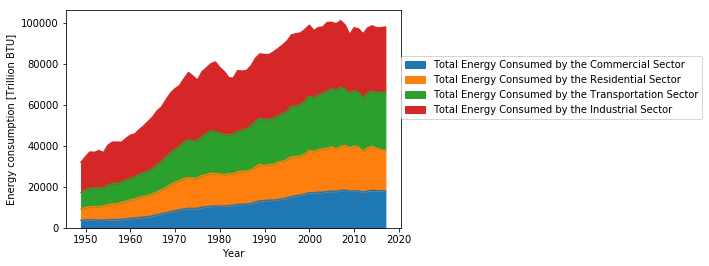

In [23]:
df5.plot(kind='area')
plt.legend(loc=(1,0.5))
plt.ylabel('Energy consumption [Trillion BTU]')